In [406]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import time
THRESHOLD = 500

In [407]:
img = cv2.imread('1.png',-1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

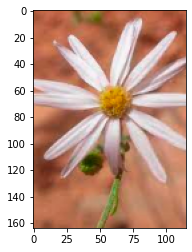

In [408]:
img = img[10:img.shape[0] -20, 10:img.shape[1] -20]
plt.imshow(img)

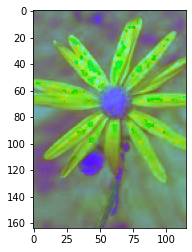

In [409]:
HLS_img = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
plt.imshow(HLS_img)

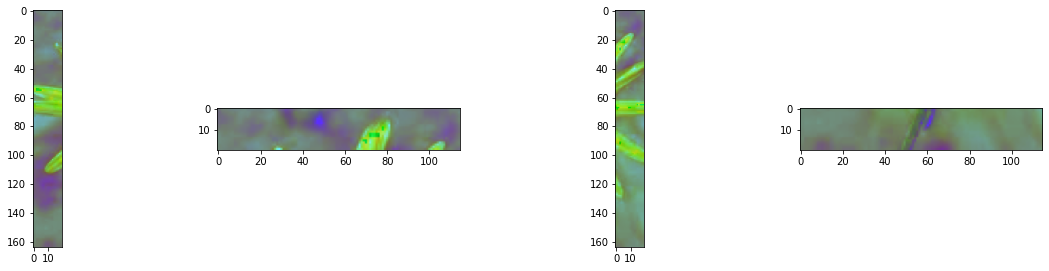

In [410]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
#left
left_boundary = HLS_img[:,0:20]
plt.imshow(left_boundary)
ax = fig.add_subplot(4,4,2)
#top
top_boundary = HLS_img[:20,:]
plt.imshow(top_boundary)
ax = fig.add_subplot(4,4,3)
#right
right_boundary = HLS_img[:,-20:]
plt.imshow(right_boundary)
ax = fig.add_subplot(4,4,4)

#bottom
bottom_boundary = HLS_img[-20:,:]           
plt.imshow(bottom_boundary)

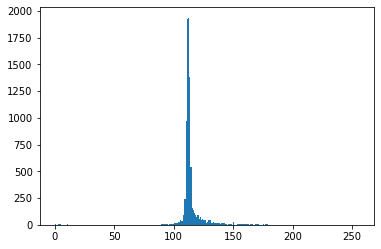

In [411]:
#boundary_hues = bottom_boundary[:,:,0].flatten().tolist() +top_boundary[:,:,0].flatten().tolist() + left_boundary[:,:,0].flatten().tolist() + right_boundary[:,:,0].flatten().tolist()
boundary_hues = top_boundary[:,:,0].flatten().tolist() + left_boundary[:,:,0].flatten().tolist() + right_boundary[:,:,0].flatten().tolist()
hist = plt.hist(boundary_hues
    ,256,[0,256])

In [412]:
hue_thresholds = [i for i in range(256) if hist[0][i] >= THRESHOLD]
print(hue_thresholds)

[110, 111, 112, 113, 114]


In [413]:
for row in range(HLS_img.shape[0]):
    for col in range(HLS_img.shape[1]):
        for hue in hue_thresholds:
            if HLS_img[row][col][0] == hue:
                HLS_img[row][col][0] = 0
                HLS_img[row][col][1] = 0
                HLS_img[row][col][2] = 0

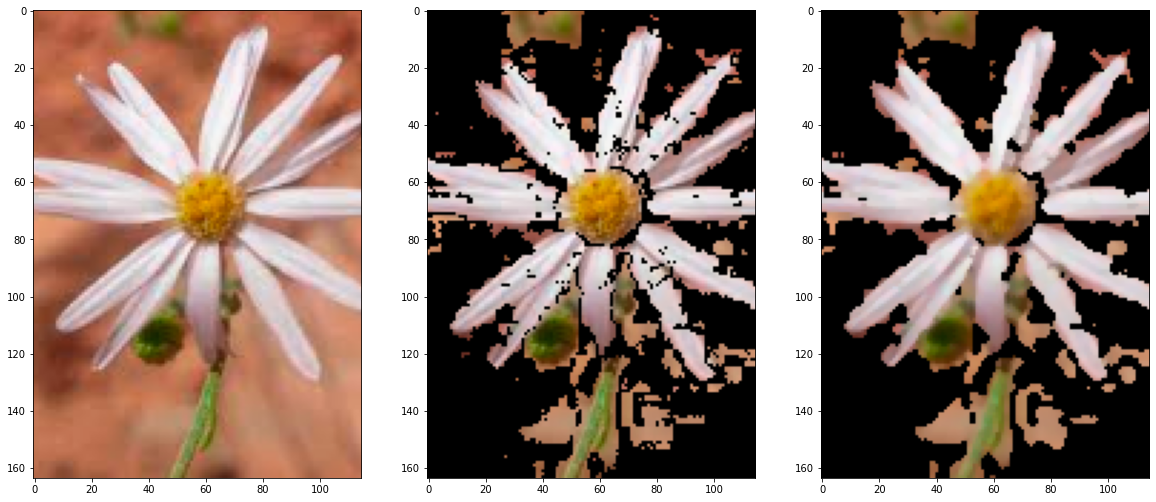

In [414]:
new_img = cv2.cvtColor(HLS_img,cv2.COLOR_HLS2BGR)
new_img2 = cv2.medianBlur(new_img,3)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3,1)
plt.imshow(img)
ax = fig.add_subplot(1,3,2)
plt.imshow(new_img)
ax = fig.add_subplot(1,3,3)
plt.imshow(new_img2)